<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Motivation---a-constant-approximation" data-toc-modified-id="Motivation---a-constant-approximation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Motivation - a constant approximation</a></span></li><li><span><a href="#Motivation---a-linear-approximation-(a-&quot;linearisation&quot;)" data-toc-modified-id="Motivation---a-linear-approximation-(a-&quot;linearisation&quot;)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Motivation - a linear approximation (a "linearisation")</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Taylor-series-example" data-toc-modified-id="Taylor-series-example-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Taylor series example</a></span></li></ul></li><li><span><a href="#Aside:-Big-O-notation" data-toc-modified-id="Aside:-Big-O-notation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Aside: Big O notation</a></span></li></ul></li><li><span><a href="#Truncation-error" data-toc-modified-id="Truncation-error-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Truncation error</a></span></li><li><span><a href="#FURTHER-READING:" data-toc-modified-id="FURTHER-READING:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><strong>FURTHER READING:</strong></a></span></li></ul></div>

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Taylor series

A Taylor series is a method by which we can approximate an arbitrary function by a sum of terms made up of that function and its derivatives at a single point.

This concept underlies many things (especially in computational science) so it's worth us spending some time reviewing it.


## Motivation - a constant approximation

Consider a function of a single independent variable:  $f(x)$

Suppose this function is really really expensive to evaluate. Suppose I have already evaluated it at a single $x$ value, call it $x_0$, i.e. I know the value of $f(x_0)$.

Given only this information, what is the best guess (estimation/approximation) I can make for $f(x)$ for a choice $x\ne x_0$?

Well I can't really do anything better than 

$$  f(x) \approx f(x_0)$$

This may seem a hopeless approximation, but it can be used in some situations. Pretend $f$ is a weather forecast and $x$ is time. This just says that for a forecast of the weather tomorrow use what we see today - this is a real technique called [*persistent forecast*](https://en.wikipedia.org/wiki/Weather_forecasting#Persistence) ("today equals tomorrow").

"... This makes persistence a 'hard to beat' method for forecasting longer time periods": <http://ww2010.atmos.uiuc.edu/(Gh)/guides/mtr/fcst/mth/prst.rxml>

Let's consider an example:

In [6]:
def f(x):
    return np.exp(x)

and plot our current situation, assuming that $x_0=0$. We call this the expansion point - we are constructing an approximation "around this point".

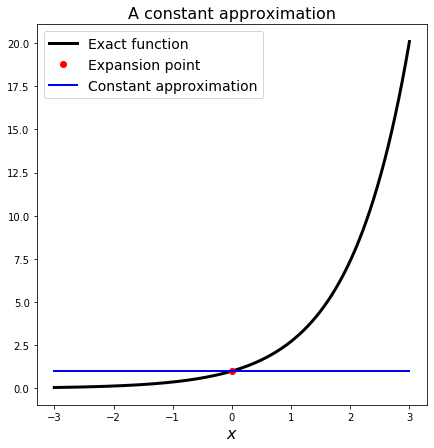

In [7]:
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)

ax1.set_title('A constant approximation', fontsize=16)
ax1.set_xlabel('$x$', fontsize=16)

# define our x for plotting purposes
x = np.linspace(-3., 3., 1000)

# plot exact function
ax1.plot(x, f(x), 'k', lw=3, label='Exact function')

# define our approximation
x0 = 0.0
y = f(x0)*np.ones_like(x)
ax1.plot(x0, f(x0), 'ro', label='Expansion point')

# and plot the constant approximation
ax1.plot(x, y, 'b', lw=2, label='Constant approximation')

ax1.legend(loc='best', fontsize=14)

Can I have any confidence in this guess?


1. Yes if it turns out that the function $f$ is actually a constant.


2. Yes, if I can assume that $f$ doesn't vary very much in the vicinity of $x_0$, and if we are interested in $x$ values that are close to $x_0$.


How can I do better?

## Motivation - a linear approximation (a "linearisation")

The obvious improvement we can make is to approximate the true function with a linear approximation rather than a constant. 

This is a common way to write a linear function:

$$ y = mx + c$$

where $m$ is the slope and $c$ is the intercept - the $y$ value the line hits the $x=0$ axis at.

We consider an approximation, or an expansion, (or in this case a "linearisation") "about a point".  

For us the point is $x_0$ and it makes sense for us to make the slope of the linear approximation the same as the derivative of the function at this point.  

So we are now using the value of $f$ at $x_0$ AND the value of the derivative of $f$ at $x_0$:  $m = f'(x_0)$.

This is the formula for the linear line with this slope:

$$ y = f'(x_0) x + c$$

where choice of $c$ moves the linear line up and down. We want it to pass through the function at $x_0$ as well of course, and this allows us to figure out what value $c$ should take.

Actually we generally write the linearisation in the following form

$$ f(x) \approx f(x_0) + (x-x_0)f'(x_0)$$

so when $(x-x_0)$ is zero, we are at the expansion point and we indeed get $f(x_0)$ on the RHS. As we move away from that point $(x-x_0)$ grows and our approximation adds a correction based on the size of the derivative at $x_0$.

Let's plot this. First we need to define the derivative:

In [8]:
# of course for our example f this is trivial:
def fx(x):
    return np.exp(x)

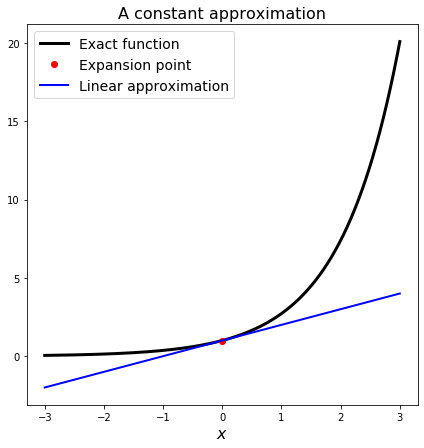

In [9]:
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)

ax1.set_title('A constant approximation', fontsize=16)
ax1.set_xlabel('$x$', fontsize=16)

# define our x for plotting purposes
x = np.linspace(-3., 3., 1000)

# plot exact function
ax1.plot(x, f(x), 'k', lw=3, label='Exact function')

# define our approximation
x0 = 0.0
y = (f(x0) + (x-x0)*fx(x0))*np.ones_like(x)
ax1.plot(x0, f(x0), 'ro', label='Expansion point')

# and plot the constant approximation
ax1.plot(x, y, 'b', lw=2, label='Linear approximation')

ax1.legend(loc='best', fontsize=14)


This is clearly an improved approximation compared to the constant one.

However the same accuracy points hold: if we are a long way from the expansion point, or if $f$ is very complex, this may not be a good approximation.

Can we do better - yes we can consider the curvature of the black line in addition to its value and its slope, i.e. we can include a term proportional to $f''(x_0)$ to our approximation.

and so on...

This is the formula for the infinite Taylor series *about (or around) the point $x_0$* 

$$f(x) = f(x_0) + (x - x_0) f'(x_0) + \frac{(x - x_0)^2}{2!} f''(x_0) + \frac{(x - x_0)^3}{3!} f'''(x_0) +
\frac{(x - x_0)^4}{4!} f^{(iv)}(x_0) + \ldots$$

An equivalent way of writing this expansion is

$$ f(x_0+h)  = f(x_0) + hf'(x_0) + \frac{h^2}{2!}f''(x_0) + \frac{h^3}{3!}f'''(x_0) + \ldots $$

or replace $h$ by the notation $\Delta x$ or $\delta x$.

As we include more and more terms our approximation improves - see the following animated gif from Wikipedia which explains the point.

#### Taylor series example

*Wikipedia image: The exponential function (in blue), and the sum of the first (n + 1) terms of its Taylor series expansion around the point 0 (in red).*

<img src="https://upload.wikimedia.org/wikipedia/commons/6/62/Exp_series.gif" width=200x>


More terms equate with a better approximation valid a larger distance from $x_0$. 

### Aside: Big O notation

When talking about terms in infinite series (terms we will often be forces to truncate, i.e. throw away), or talking about errors, convergence, complexity, run times etc, so-called [Big-O](https://en.wikipedia.org/wiki/Big_O_notation) notation is very useful.

As an alternative to writing "\\( \ldots \\)" in the above infinite expansions, we can also write 

$$f(x) = f(x_0) + (x - x_0) f'(x_0) + \frac{(x - x_0)^2}{2!} f''(x_0) + \frac{(x - x_0)^3}{3!} f'''(x_0) + \mathcal{O}((x - x_0)^4)$$

or

$$ f(x_0+h) = f(x_0) + hf'(x_0) + \frac{h^2}{2!}f''(x_0) + \frac{h^3}{3!}f'''(x_0) + \mathcal{O}(h^4) $$


What does this mean?

**LINK TO THE NOTEBOOK ON BIG O NOTATION**



## Truncation error

In principle we can use Taylor series to approximate a (sufficiently smooth) function with arbitrary accuracy as long as we use sufficiently many terms, but in practice we will have to truncate.

In the next section we will use similar ideas to compute an approximate solution to a differential equations, we will do this by approximating the operation of taking a derivative. 

Again by making use of enough terms from a Taylor series we can construct approximations of derivatives with arbitrary accuracy, but again in practice we will have to truncate.

In both cases the act of limiting the number of terms we use introduces an error.

Since we are truncating an infinite series at some point, this type of error is often called a [*truncation error*](https://en.wikipedia.org/wiki/Truncation_error). 

## **FURTHER READING:**

For an application of Taylor series see the notebook on timestepping ODEs